# T student

In [5]:
from scipy.stats import ttest_ind

# Datos simulados
condicion_A = [3.5, 3.7, 3.6, 3.4, 3.8]
condicion_B = [4.1, 4.2, 4.0, 4.3, 4.1]

# Prueba t
stat, p_value = ttest_ind(condicion_A, condicion_B)

print(f"Estadístico t: {stat:.3f}")
print(f"P-valor: {p_value:.3f}")

if p_value < 0.05:
    print("Hay diferencias significativas entre las condiciones A y B.")
else:
    print("No hay diferencias significativas entre las condiciones A y B.")


Estadístico t: -6.194
P-valor: 0.000
Hay diferencias significativas entre las condiciones A y B.


# Anova

In [6]:
from scipy.stats import f_oneway

# Datos simulados
condicion_A = [3.5, 3.7, 3.6, 3.4, 3.8]
condicion_B = [4.1, 4.2, 4.0, 4.3, 4.1]
condicion_C = [3.8, 3.7, 3.9, 3.6, 3.7]

# ANOVA
stat, p_value = f_oneway(condicion_A, condicion_B, condicion_C)

print(f"Estadístico F: {stat:.3f}")
print(f"P-valor: {p_value:.3f}")

if p_value < 0.05:
    print("Hay diferencias significativas entre las condiciones.")
else:
    print("No hay diferencias significativas entre las condiciones.")


Estadístico F: 23.098
P-valor: 0.000
Hay diferencias significativas entre las condiciones.


           sum_sq   df     F    PR(>F)
Condición    0.38  2.0  19.0  0.002536
Residual     0.06  6.0   NaN       NaN


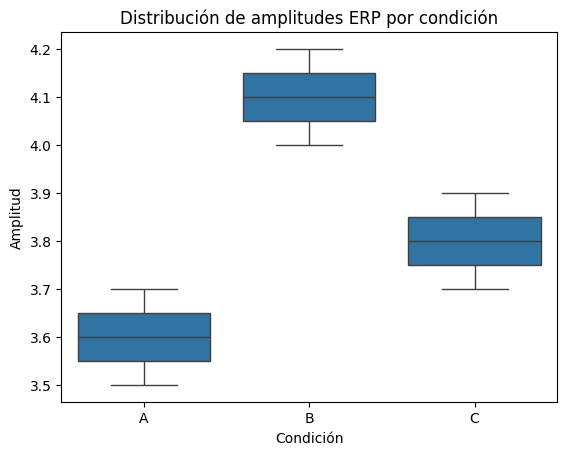

In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

# Ejemplo de datos: amplitud promedio de ERP en la ventana 200-300 ms
data = pd.DataFrame({
    'Amplitud': [3.5, 3.7, 3.6, 4.1, 4.2, 4.0, 3.8, 3.7, 3.9],
    'Condición': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C']
})

# Realizar ANOVA
modelo = ols('Amplitud ~ Condición', data=data).fit()
anova_resultados = sm.stats.anova_lm(modelo, typ=2)

print(anova_resultados)

# Visualización de datos
sns.boxplot(x='Condición', y='Amplitud', data=data)
plt.title('Distribución de amplitudes ERP por condición')
plt.show()


In [7]:
import numpy as np

# Simulación de ERP
tiempo = np.linspace(0, 500, 1000)  # 0 a 500 ms, 1000 puntos
erp = np.sin(tiempo / 50) + 3  # ERP simulado con ruido
ruido = np.random.normal(0, 0.1, len(tiempo))
erp_ruidoso = erp + ruido

# Selección de ventana
ventana_inicio, ventana_fin = 200, 300  # ms
indices_ventana = (tiempo >= ventana_inicio) & (tiempo <= ventana_fin)

# Promedio en la ventana
amplitud_promedio = np.mean(erp_ruidoso[indices_ventana])
print(f"Amplitud promedio en la ventana: {amplitud_promedio:.3f} μV")

# Pico dentro de la ventana
amplitud_pico = np.max(erp_ruidoso[indices_ventana])
latencia_pico = tiempo[indices_ventana][np.argmax(erp_ruidoso[indices_ventana])]
print(f"Amplitud del pico: {amplitud_pico:.3f} μV, Latencia del pico: {latencia_pico:.1f} ms")


Amplitud promedio en la ventana: 2.194 μV
Amplitud del pico: 2.851 μV, Latencia del pico: 299.3 ms
